In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
train_EOSINOPHIL = os.path.join (r"/Users/kunalindore/Documents/Northeastern Academics/DS 5220 SML/Project/Blood_Cell_Types/dataset2-master/dataset2-master/images-train/TRAIN/EOSINOPHIL")

train_LYMPHOCYTE = os.path.join (r"/Users/kunalindore/Documents/Northeastern Academics/DS 5220 SML/Project/Blood_Cell_Types/dataset2-master/dataset2-master/images-train/TRAIN/LYMPHOCYTE")

train_MONOCYTE = os.path.join (r"/Users/kunalindore/Documents/Northeastern Academics/DS 5220 SML/Project/Blood_Cell_Types/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE")

train_NEUTROPHIL = os.path.join (r"/Users/kunalindore/Documents/Northeastern Academics/DS 5220 SML/Project/Blood_Cell_Types/dataset2-master/dataset2-master/images/TRAIN/NEUTROPHIL")

In [3]:
test_EOSINOPHIL = os.path.join (r"/Users/kunalindore/Documents/Northeastern Academics/DS 5220 SML/Project/Blood_Cell_Types/dataset2-master/dataset2-master/images-train/TEST/EOSINOPHIL")

test_LYMPHOCYTE = os.path.join (r"/Users/kunalindore/Documents/Northeastern Academics/DS 5220 SML/Project/Blood_Cell_Types/dataset2-master/dataset2-master/images-train/TEST/LYMPHOCYTE")

test_MONOCYTE = os.path.join (r"/Users/kunalindore/Documents/Northeastern Academics/DS 5220 SML/Project/Blood_Cell_Types/dataset2-master/dataset2-master/images-train/TEST/MONOCYTE")

test_NEUTROPHIL = os.path.join (r"/Users/kunalindore/Documents/Northeastern Academics/DS 5220 SML/Project/Blood_Cell_Types/dataset2-master/dataset2-master/images-train/images\TEST/NEUTROPHIL")

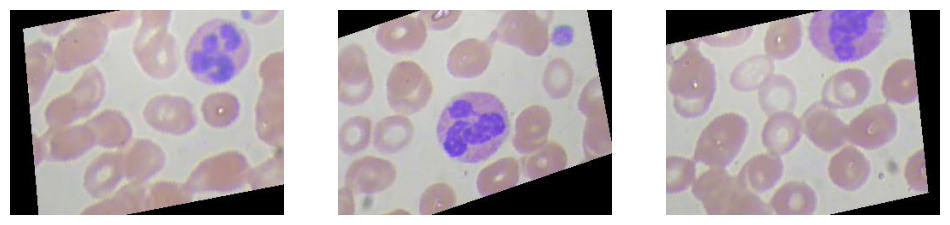

In [4]:
eosinophil_img = [os.path.join(train_EOSINOPHIL, file)
    for file in os.listdir(train_EOSINOPHIL)[:3]]
plt.figure(figsize=(12, 3))
for i, img_path in enumerate(eosinophil_img):
    sp = plt.subplot(1, 3, i+1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
from sklearn.metrics import accuracy_score, classification_report

In [6]:
#datagen = ImageDataGenerator(zoom_range = 0.2,validation_split=0.2)
datagen = ImageDataGenerator()
train_generator = datagen.flow_from_directory(
    directory=r"/Users/kunalindore/Documents/Northeastern Academics/DS 5220 SML/Project/Blood_Cell_Types/dataset2-master/dataset2-master/images-train/TRAIN", 
    target_size=(128, 128), 
    batch_size=128, 
    class_mode='categorical',
    #subset = "training"
)

test_generator = datagen.flow_from_directory(
    directory=r"/Users/kunalindore/Documents/Northeastern Academics/DS 5220 SML/Project/Blood_Cell_Types/dataset2-master/dataset2-master/images-train/TEST", 
    target_size=(128, 128), 
    batch_size=128, 
    class_mode='categorical',
   #subset = "validation"
)

Found 6134 images belonging to 4 classes.
Found 1990 images belonging to 4 classes.


In [7]:
model = keras.Sequential([
    layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (128, 128, 3)),
    layers.MaxPool2D(pool_size = 2),
    
    layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same'),
    layers.MaxPool2D(pool_size = 2),
    layers.Dropout(0.25),
    #layers.Dropout(0.5),
    
    layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same'),
    layers.MaxPool2D(pool_size = 2),
    layers.Dropout(0.25),
    
    layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu', padding = 'same'),
    layers.MaxPool2D(pool_size = 2),
    layers.Dropout(0.25),
    #layers.Dropout(0.5),
    
    layers.GlobalAveragePooling2D(),
    
    layers.Dense(units = 54, activation = 'relu'),
    
    layers.Dropout(0.25),
    #layers.Dropout(0.5),
    layers.Dense(units = 4, activation = 'softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 32, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       7

2022-11-29 11:57:57.098377: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [9]:
# history = model.fit(train_generator,epochs=2,validation_data=test_generator)

In [10]:
history = model.fit(train_generator,epochs=30,validation_data=test_generator)

Epoch 1/30
48/48 [==============================] - 73s 2s/step - loss: 3.5141 - accuracy: 0.2846 - val_loss: 1.3905 - val_accuracy: 0.2608
Epoch 2/30
48/48 [==============================] - 74s 2s/step - loss: 1.3552 - accuracy: 0.2970 - val_loss: 1.3938 - val_accuracy: 0.2508
Epoch 3/30
48/48 [==============================] - 75s 2s/step - loss: 1.3520 - accuracy: 0.2837 - val_loss: 1.3874 - val_accuracy: 0.3055
Epoch 4/30
48/48 [==============================] - 72s 2s/step - loss: 1.3499 - accuracy: 0.2877 - val_loss: 1.3934 - val_accuracy: 0.2492
Epoch 5/30
48/48 [==============================] - 72s 1s/step - loss: 1.3324 - accuracy: 0.3278 - val_loss: 1.3828 - val_accuracy: 0.2935
Epoch 6/30
48/48 [==============================] - 73s 2s/step - loss: 1.3292 - accuracy: 0.3383 - val_loss: 1.3856 - val_accuracy: 0.2970
Epoch 7/30
48/48 [==============================] - 73s 2s/step - loss: 1.3358 - accuracy: 0.3305 - val_loss: 1.3856 - val_accuracy: 0.3181
Epoch 8/30
48/48 [==